In [1]:
import csv
import pandas as pd
import math
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.signal as ss
%matplotlib inline

In [2]:
no_of_participants = 7


def compileTests(testNo, ids):
    fout=open("test"+str(testNo)+"-all.csv","w")
        
    # now the rest:    
    for pno in range(1, no_of_participants+1):
        for idno in range(1, ids+1):
            f = open("Test"+str(testNo)+"/test"+str(testNo)+"-ID"+str(idno)+"-P"+str(pno)+".csv")
            f.__next__() # skip the header
            for line in f:
                 fout.write(line)
            f.close() # not really needed
    fout.close()
    
compileTests(1,3)
compileTests(2,2)
compileTests(3,3)
compileTests(4,3)
compileTests(5,6)
compileTests(6,3)

In [3]:
test1headers = ['trialNo', 'targetX', 'targetY', 'participant', 'testTime', 'trialTime', 'mouseX', 'mouseY', 'click', 'targetLength', 'overTarget', 'misses']
test2headers = ['trialNo', 'resetPosNo', 'targetX', 'targetY', 'targetNo', 'participant', 'testID', 'testTime', 'trialTime', 'mouseX', 'mouseY', 'click', 'targetHeight', 'targetWidth', 'overTarget', 'overDistractor', 'misses']
test3headers = ['targetCount', 'targetX', 'targetY', 'participant', 'testID', 'testTime', 'mouseX', 'mouseY', 'click', 'targetHeight', 'targetWidth', 'overTarget', 'hits', 'misses']
test4headers = ['targetX', 'targetY', 'participant', 'tunnelWidth', 'testTime', 'mouseX', 'mouseY', 'click', 'targetHeight', 'targetWidth', 'overTarget', 'crossed', 'crossedCount', 'hits']
test5headers = ['targetX', 'targetY', 'participant', 'tunnelWidth', 'testTime', 'mouseX', 'mouseY', 'targetHeight', 'targetWidth', 'overTarget', 'crossed', 'crossedCount', 'click', 'hits', 'misses']
test6headers = ['targetNo', 'targetX', 'targetY', 'participant', 'testID', 'testTime', 'trialTime', 'mouseX', 'mouseY', 'click', 'targetRadius', 'distance', 'overTarget', 'hits', 'misses']

In [4]:
test1all = pd.read_csv("test1-all.csv", names=test1headers)
test2all = pd.read_csv("test2-all.csv", names=test2headers)
test3all = pd.read_csv("test3-all.csv", names=test3headers)
test4all = pd.read_csv("test4-all.csv", names=test4headers)
test5all = pd.read_csv("test5-all.csv", names=test5headers)
test6all = pd.read_csv("test6-all.csv", names=test6headers)

In [5]:
#Function to calculate distance between two points
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return dist

#Function to calculate Fitts' index of difficutly
def calculateID(amplitude, width):
    return math.log2((amplitude/width)+1)

# Test 1

In [6]:
target1 = test1all.loc[(test1all['targetX'] == 100) & (test1all['targetY'] == 50)]
target2 = test1all.loc[(test1all['targetX'] == 500) & (test1all['targetY'] == 500)]
target3 = test1all.loc[(test1all['targetX'] == 1140) & (test1all['targetY'] == 800)]
target4 = test1all.loc[(test1all['targetX'] == 1340) & (test1all['targetY'] == 600)]
target5 = test1all.loc[(test1all['targetX'] == 1340) & (test1all['targetY'] == 30)]
target6 = test1all.loc[(test1all['targetX'] == 250) & (test1all['targetY'] == 600)]
target7 = test1all.loc[(test1all['targetX'] == 350) & (test1all['targetY'] == 300)]
target8 = test1all.loc[(test1all['targetX'] == 870) & (test1all['targetY'] == 600)]
target9 = test1all.loc[(test1all['targetX'] == 920) & (test1all['targetY'] == 450)]
target10 = test1all.loc[(test1all['targetX'] == 720) & (test1all['targetY'] == 100)]

resetCoords = [720, 450]

In [7]:
def test1mods(target):
    target['targetDistance'] = target.apply(lambda x: calculateDistance(x.targetX, x.targetY, x.mouseX, x.mouseY), axis=1)
    target['startDistance'] = target.apply(lambda x: calculateDistance(720, 450, x.mouseX, x.mouseY), axis=1)
    target['timeDifference'] = (target['trialTime'] - target['trialTime'].shift(1))

test1targets = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]

for i in test1targets:
    test1mods(i)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value

In [8]:
def test1Plot1(target, margins, heading):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(13,5), dpi= 100)
    
    for i in range (1, 11):
        for j in range (1, no_of_participants+1):
            
            #Adjust i and j to get required participant and trial 
            size1 = target.loc[(target['trialNo'] == i) & (target['participant'] == j) & (target['targetLength'] == 75)]
            size2 = target.loc[(target['trialNo'] == i) & (target['participant'] == j) & (target['targetLength'] == 50)]
            size3 = target.loc[(target['trialNo'] == i) & (target['participant'] == j) & (target['targetLength'] == 25)]
            
            ax1.plot(size1['trialTime'], size1['startDistance'], linewidth=0.5, color='green')
            ax2.plot(size2['trialTime'], size2['startDistance'], linewidth=0.5, color='green')
            ax3.plot(size3['trialTime'], size3['startDistance'], linewidth=0.5, color='green')
            
    ax1.set_title('Target Size: 75px')
    ax2.set_title('Target Size: 50px')
    ax3.set_title('Target Size: 25px')
    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax2.set_xlabel('Time (s)')
    ax1.set_ylabel('Distance (px)')
    
    
    ax1.hlines(margins[0][0], 0, target['trialTime'].loc[target['targetLength']==75].max(), 'r', linewidth=1)
    ax1.hlines(margins[0][1], 0, target['trialTime'].loc[target['targetLength']==75].max(), 'r', linewidth=1)
    
    ax2.hlines(margins[1][0], 0, target['trialTime'].loc[target['targetLength']==50].max(), 'r', linewidth=1)
    ax2.hlines(margins[1][1], 0, target['trialTime'].loc[target['targetLength']==50].max(), 'r', linewidth=1)
    
    ax3.hlines(margins[2][0], 0, target['trialTime'].loc[target['targetLength']==25].max(), 'r', linewidth=1)
    ax3.hlines(margins[2][1], 0, target['trialTime'].loc[target['targetLength']==25].max(), 'r', linewidth=1)
        
    

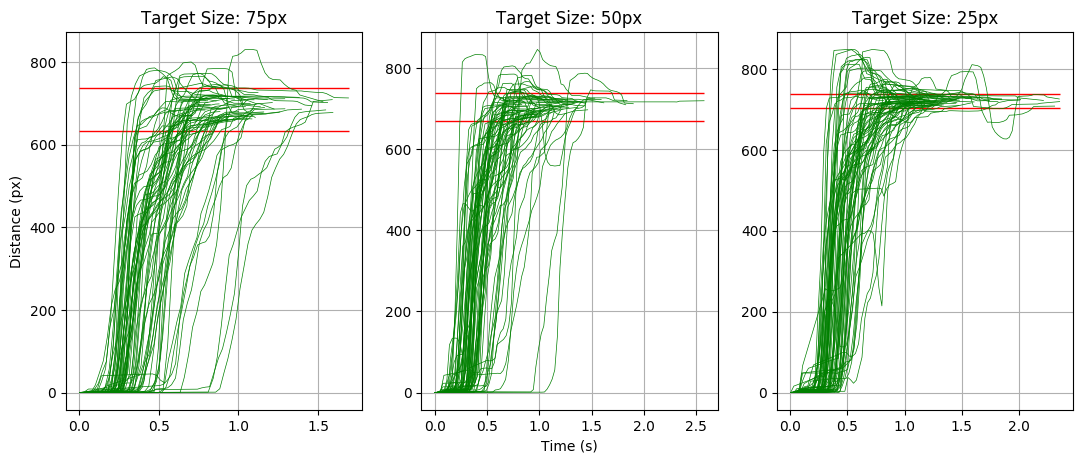

In [9]:
# The minimum and maximum distances to the target for each target size
target1margins = [[737.83, 634.54], [737.83, 668.87], [737.83, 703.31]]
target2margins = [[253.03, 153.37], [241.66, 177.20], [232.43, 201.30]]
target3margins = [[652.41, 546.71], [617.17, 546.71], [581.93, 546.71]]
target4margins = [[730.51, 637.88], [699.21, 637.88], [668.31, 637.88]]
target5margins = [[812.04, 709.52], [790.75, 722.01], [769.69, 735.13]]
target6margins = [[521.08, 422.52], [510.78, 445.98], [501.52, 469.60]]
target7margins = [[399.24, 304.38], [399.24, 335.26], [399.24, 366.94]]
target8margins = [[318.19, 212.13], [282.84, 212.13], [247.48, 212.13]]
target9margins = [[285.04, 200.0], [254.95, 200.0], [226.38, 200.0]]
target10margins = [[357.94, 275.0], [353.55, 300.0], [350.89, 325.0]]

# change arguements as required
# target margins need to match target no
test1Plot1(target1, target1margins, "Target-1")



Text(0.5, 1.0, 'Jitter Plot')

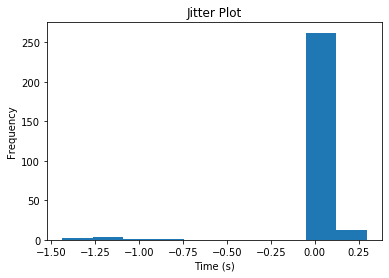

In [10]:
# Jitter plot to make sure sampling is consistent
samples = target1.loc[(target1['targetLength'] == 25) & (target1['trialNo'] == 1)]
plt.hist(samples['timeDifference'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title('Jitter Plot')

# Test 2

## ID 1 (Horizontal Layout)

In [11]:
target1 = [205, 50]
target2 = [410, 50]
target3 = [615, 50]
target4 = [820, 50]
target5 = [1025, 50]

resetcoord1 = [720, 300]
resetcoord2 = [720, 470]
resetcoord3 = [720, 640]
resetcoord4 = [720, 810]

    
def processTest2(targetCoords, resetCoordNo):
    requiredTargets = test2all.loc[(test2all['targetX'] == targetCoords[0]) & (test2all['targetY'] == targetCoords[1]) & (test2all['resetPosNo'] == resetCoordNo)]
    return requiredTargets

target1reset1 = processTest2(target1, 1)
target1reset2 = processTest2(target1, 2)
target1reset3 = processTest2(target1, 3)
target1reset4 = processTest2(target1, 4)

target2reset1 = processTest2(target2, 1)
target2reset2 = processTest2(target2, 2)
target2reset3 = processTest2(target2, 3)
target2reset4 = processTest2(target2, 4)

target3reset1 = processTest2(target3, 1)
target3reset2 = processTest2(target3, 2)
target3reset3 = processTest2(target3, 3)
target3reset4 = processTest2(target3, 4)

target4reset1 = processTest2(target4, 1)
target4reset2 = processTest2(target4, 2)
target4reset3 = processTest2(target4, 3)
target4reset4 = processTest2(target4, 4)

target5reset1 = processTest2(target5, 1)
target5reset2 = processTest2(target5, 2)
target5reset3 = processTest2(target5, 3)
target5reset4 = processTest2(target5, 4)

reset1Targets = [target1reset1, target2reset1, target3reset1, target4reset1, target5reset1]
reset2Targets = [target1reset2, target2reset2, target3reset2, target4reset2, target5reset2]
reset3Targets = [target1reset3, target2reset3, target3reset3, target4reset3, target5reset3]
reset4Targets = [target1reset4, target2reset4, target3reset4, target4reset4, target5reset4]

In [12]:
def getOverDistractorCount(resetTargets):
    sumDis = 0
    for target in resetTargets:
        sumDis += target['overDistractor'].sum() 
    return sumDis

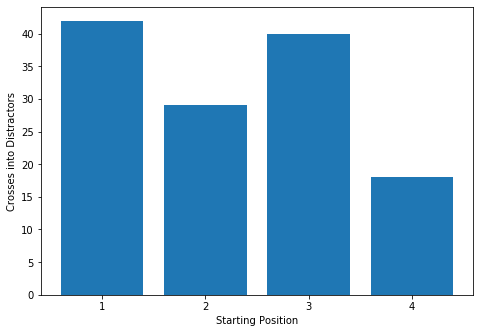

In [13]:
reset1Count = getOverDistractorCount(reset1Targets)
reset2Count = getOverDistractorCount(reset2Targets)
reset3Count = getOverDistractorCount(reset3Targets)
reset4Count = getOverDistractorCount(reset4Targets)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1', '2', '3', '4']
students = [reset1Count, reset2Count, reset3Count, reset4Count]
ax.bar(langs,students)
ax.set_xlabel('Starting Position')
ax.set_ylabel('Crosses into Distractors')
plt.show()


## ID 2 (Vertical Layout)

In [14]:
target1 = [20, 290]
target2 = [20, 360]
target3 = [20, 430]
target4 = [20, 500]
target5 = [20, 570]

resetcoord1 = [340, 450]
resetcoord2 = [540, 450]
resetcoord3 = [740, 450]
resetcoord4 = [940, 450]

target1reset1 = processTest2(target1, 1)
target1reset2 = processTest2(target1, 2)
target1reset3 = processTest2(target1, 3)
target1reset4 = processTest2(target1, 4)

target2reset1 = processTest2(target2, 1)
target2reset2 = processTest2(target2, 2)
target2reset3 = processTest2(target2, 3)
target2reset4 = processTest2(target2, 4)

target3reset1 = processTest2(target3, 1)
target3reset2 = processTest2(target3, 2)
target3reset3 = processTest2(target3, 3)
target3reset4 = processTest2(target3, 4)

target4reset1 = processTest2(target4, 1)
target4reset2 = processTest2(target4, 2)
target4reset3 = processTest2(target4, 3)
target4reset4 = processTest2(target4, 4)

target5reset1 = processTest2(target5, 1)
target5reset2 = processTest2(target5, 2)
target5reset3 = processTest2(target5, 3)
target5reset4 = processTest2(target5, 4)

reset1Targets = [target1reset1, target2reset1, target3reset1, target4reset1, target5reset1]
reset2Targets = [target1reset2, target2reset2, target3reset2, target4reset2, target5reset2]
reset3Targets = [target1reset3, target2reset3, target3reset3, target4reset3, target5reset3]
reset4Targets = [target1reset4, target2reset4, target3reset4, target4reset4, target5reset4]


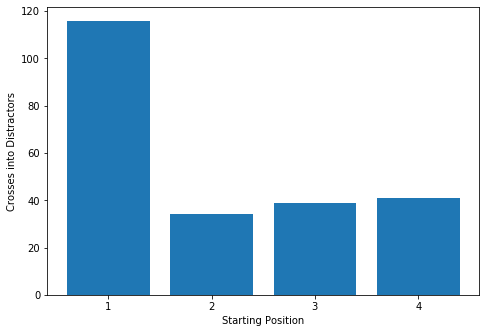

In [15]:
reset1Count = getOverDistractorCount(reset1Targets)
reset2Count = getOverDistractorCount(reset2Targets)
reset3Count = getOverDistractorCount(reset3Targets)
reset4Count = getOverDistractorCount(reset4Targets)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1', '2', '3', '4']
students = [reset1Count, reset2Count, reset3Count, reset4Count]
ax.bar(langs,students)
ax.set_xlabel('Starting Position')
ax.set_ylabel('Crosses into Distractors')
plt.show()

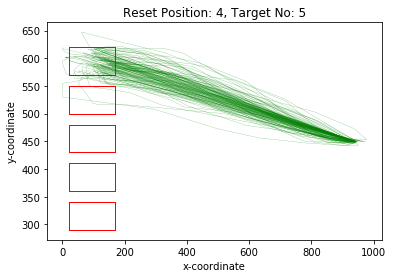

In [16]:
target1x=[20,170,170,20,20]
target1y=[290,290,340,340,290]

target2x=[20,170,170,20,20]
target2y=[360,360,410,410,360]

target3x=[20,170,170,20,20]
target3y=[430,430,480,480,430]

target4x=[20,170,170,20,20]
target4y=[500,500,550,550,500]

target5x=[20,170,170,20,20]
target5y=[570,570,620,620,570]

def plotVerticalLayoutMotions(target):
    for j in range(1, 11):
        requiredData = target.loc[(target['trialNo'] == j)]
        plt.plot(requiredData['mouseX'], requiredData['mouseY'], linewidth = 0.15, color="green")
        plt.plot(target1x, target1y, linewidth = 1, color='red')
        plt.plot(target2x, target2y, linewidth = 1, color='red')
        plt.plot(target3x, target3y, linewidth = 1, color='red')
        plt.plot(target4x, target4y, linewidth = 1, color='red')
        plt.plot(target5x, target5y, linewidth = 1, color='red')
        plt.xlabel("x-coordinate")
        plt.ylabel("y-coordinate")
        plt.title("Reset Position: 4, Target No: 5")
    

#change argument as required to get plot of required target from required starting point    
plotVerticalLayoutMotions(target5reset4) 

## Test 3

In [17]:
def dynamics(target):
    target['targetDistance'] = target.apply(lambda x: calculateDistance(x.targetX, x.targetY, x.mouseX, x.mouseY), axis=1)
    target['distanceTravelled'] = (target['targetDistance'].shift(1) - target['targetDistance']).abs()
    target['timechange'] = (target['testTime'] - target['testTime'].shift(1))  
    target['xDif'] = target['mouseX'] - target['mouseX'].shift(1)
    target['speed'] = target['distanceTravelled']/target['timechange']   
    vx = (target['speed']/target['distanceTravelled'])*target['xDif']
    target['Vx'] = vx # velocity (only x-dimension)
    target['acceleration'] = (target['speed'] - target['speed'].shift(1)) / target['timechange']

    
dynamics(test3all)

In [18]:
t3id1p1 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 1)]
t3id2p1 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 1)]
t3id3p1 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 1)]

t3id1p2 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 2)]
t3id2p2 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 2)]
t3id3p2 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 2)]

t3id1p3 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 3)]
t3id2p3 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 3)]
t3id3p3 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 3)]

t3id1p4 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 4)]
t3id2p4 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 4)]
t3id3p4 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 4)]

t3id1p5 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 5)]
t3id2p5 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 5)]
t3id3p5 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 5)]

t3id1p6 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 6)]
t3id2p6 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 6)]
t3id3p6 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 6)]

t3id1p7 = test3all.loc[(test3all['testID'] == 2) & (test3all['participant'] == 7)]
t3id2p7 = test3all.loc[(test3all['testID'] == 1) & (test3all['participant'] == 7)]
t3id3p7 = test3all.loc[(test3all['testID'] == 3) & (test3all['participant'] == 7)]


allid1 = [t3id1p1, t3id1p2, t3id1p3, t3id1p4, t3id1p5, t3id1p6, t3id1p7]
allid2 = [t3id2p1, t3id2p2, t3id2p3, t3id2p4, t3id2p5, t3id2p6, t3id2p7]
allid3 = [t3id3p1, t3id3p2, t3id3p3, t3id3p4, t3id3p5, t3id3p6, t3id3p7]

In [19]:
def sumHits(allId):
    allHits  = 0
    array = []
    if allId == 1:
        array = allid1
    elif allId == 2:
        array = allid2
    elif allId == 3:
        array = allid3
        
    for i in array: 
        hit = i['hits'].max().sum()
        allHits+=hit
        
    return allHits

  
allHitsid1 =  sumHits(1)
allHitsid2 =  sumHits(2)
allHitsid3 =  sumHits(3)

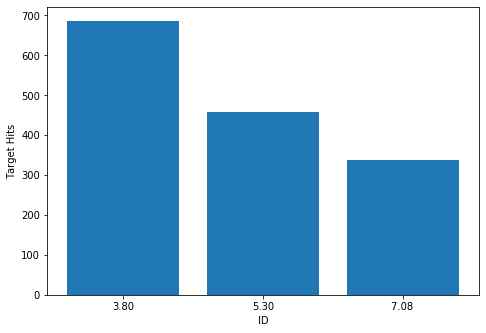

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ids = ['3.80', '5.30', '7.08 ']
hits = [allHitsid1, allHitsid2, allHitsid3]
ax.bar(ids,hits)
ax.set_xlabel('ID')
ax.set_ylabel('Target Hits')
plt.show()

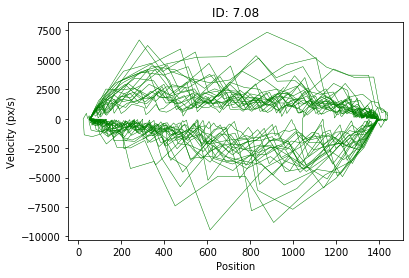

In [21]:
# phase-space plot before applying savgol filter
def test3plot1(target):
    for i in range(1, target['hits'].max()):
        target1 = target.loc[(target['targetCount'] == i)]

        plt.plot(target1['mouseX'], target1['Vx'], linewidth=0.5, color='green')
        plt.xlabel("Position")
        plt.ylabel("Velocity (px/s)")
        plt.title("ID: 7.08")

test3plot1(t3id3p3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set 

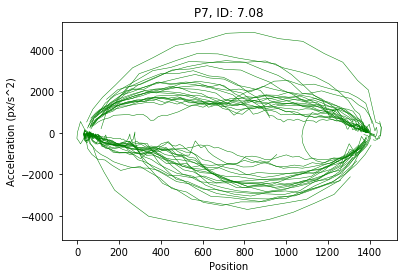

In [22]:
# method to get phase-space and hooke plots after applying savgol filter
def test3plot2(target):
    for i in range(1, target['hits'].max()):
        data = target.loc[(target['targetCount'] == i)]
        
        # applying savgol to original mouse x-coordinates
        uf = data['mouseX']
        f = ss.savgol_filter(uf, 21, 3, mode="nearest")
        
        
        data['mouseX'] = f
        
        # recalculate velocity and acceleration
        data['distanceTravelled'] = (data['targetDistance'].shift(1) - data['targetDistance']).abs()
        data['timechange'] = (data['testTime'] - data['testTime'].shift(1))
        data['xDif'] = data['mouseX'] - data['mouseX'].shift(1)
        vx = (data['speed']/data['distanceTravelled'])*data['xDif']     
        data['Vx'] = vx
        data['acceleration'] = (data['Vx'] - data['Vx'].shift(1)) / data['timechange']
        
        plt.xlabel("Position")
        plt.ylabel("Acceleration (px/s^2)")
        plt.title("P7, ID: 7.08")
        
        # to get hooke plots, just change data['Vx'] to data['acceleration']    
        plt.plot(data['mouseX'], data['Vx'], linewidth=0.5, color='green')
        

#change argument as required to get plot of required index of difficult with required participant        
test3plot2(t3id3p3)

## Test 4

In [23]:
pd.set_option('display.max_rows', test4all.shape[0]+1)

test4id1p1 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 1)]
test4id2p1 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 1)]
test4id3p1 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 1)]

test4id1p2 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 2)]
test4id2p2 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 2)]
test4id3p2 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 2)]

test4id1p3 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 3)]
test4id2p3 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 3)]
test4id3p3 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 3)]

test4id1p4 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 4)]
test4id2p4 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 4)]
test4id3p4 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 4)]

test4id1p5 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 5)]
test4id2p5 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 5)]
test4id3p5 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 5)]

test4id1p6 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 6)]
test4id2p6 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 6)]
test4id3p6 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 6)]

test4id1p7 = test4all.loc[(test4all['tunnelWidth'] == 150) & (test4all['participant'] == 7)]
test4id2p7 = test4all.loc[(test4all['tunnelWidth'] == 100) & (test4all['participant'] == 7)]
test4id3p7 = test4all.loc[(test4all['tunnelWidth'] == 50) & (test4all['participant'] == 7)]

allData = [test4id1p1, test4id2p1, test4id3p1, test4id1p2, test4id2p2, test4id3p2, test4id1p3, test4id2p3, test4id3p3,
          test4id1p4, test4id2p4, test4id3p4, test4id1p5, test4id2p5, test4id3p5, test4id1p6, test4id2p6, test4id3p6
          ,test4id1p7, test4id2p7, test4id3p7]

In [24]:
def hitChange(data):
    data['hitChange'] = (data['hits'] - data['hits'].shift(1)) 

for i in allData:
    hitChange(i)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
def changeRows(data):
    return data.loc[(data['hitChange'] == 1)]

changeRowsid1p1 = changeRows(test4id1p1)
changeRowsid2p1 = changeRows(test4id2p1)
changeRowsid3p1 = changeRows(test4id3p1)

changeRowsid1p2 = changeRows(test4id1p2)
changeRowsid2p2 = changeRows(test4id2p2)
changeRowsid3p2 = changeRows(test4id3p2)

changeRowsid1p3 = changeRows(test4id1p3)
changeRowsid2p3 = changeRows(test4id2p3)
changeRowsid3p3 = changeRows(test4id3p3)

changeRowsid1p4 = changeRows(test4id1p4)
changeRowsid2p4 = changeRows(test4id2p4)
changeRowsid3p4 = changeRows(test4id3p4)

changeRowsid1p5 = changeRows(test4id1p5)
changeRowsid2p5 = changeRows(test4id2p5)
changeRowsid3p5 = changeRows(test4id3p5)

changeRowsid1p6 = changeRows(test4id1p6)
changeRowsid2p6 = changeRows(test4id2p6)
changeRowsid3p6 = changeRows(test4id3p6)

changeRowsid1p7 = changeRows(test4id1p7)
changeRowsid2p7 = changeRows(test4id2p7)
changeRowsid3p7 = changeRows(test4id3p7)

allChangeRows = [changeRowsid1p1, changeRowsid2p1, changeRowsid3p1,
                changeRowsid1p2, changeRowsid2p2, changeRowsid3p2, 
                changeRowsid1p3, changeRowsid2p3, changeRowsid3p3,
                changeRowsid1p4, changeRowsid2p4, changeRowsid3p4,
                changeRowsid1p5, changeRowsid2p5, changeRowsid3p5,
                changeRowsid1p6, changeRowsid2p6, changeRowsid3p6,
                changeRowsid1p7, changeRowsid2p7, changeRowsid3p7]


In [26]:
def hitTime(data):
    data['hitTime'] = (data['testTime'] - data['testTime'].shift(1)) 
    
for i in allChangeRows:
    hitTime(i)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
id1 = test4all.loc[(test4all['tunnelWidth'] == 150)]
id2 = test4all.loc[(test4all['tunnelWidth'] == 100)]
id3 = test4all.loc[(test4all['tunnelWidth'] == 50)]

def getMaxCrossedCount(data):
    return data['crossedCount'].max()

getMaxCrossedCount(id3) #change id as needed 

351

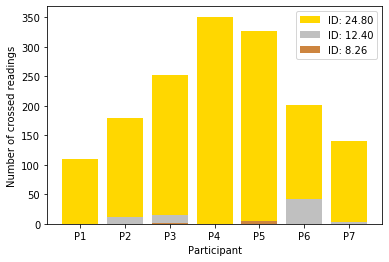

In [28]:
participants = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']
id1 = np.array([0, 0, 2, 0, 4,  0, 0])
id2 = np.array([0, 12, 15, 0, 0, 42, 3])
id3 = np.array([109, 180, 253, 351, 327, 202, 141])

ind = [x for x, _ in enumerate(participants)]

plt.bar(ind, id3, width=0.8, label='ID: 24.80', color='gold')
plt.bar(ind, id2, width=0.8, label='ID: 12.40', color='silver')
plt.bar(ind, id1, width=0.8, label='ID: 8.26', color='#CD853F')

plt.xticks(ind, participants)
plt.ylabel("Number of crossed readings")
plt.xlabel("Participant")
plt.legend(loc="upper right")

plt.show()

## Test 5

In [29]:
def getParticipantData(particpant, idNo):
    targetX = 0
    
    if idNo==1:
        targetX = 320;
    elif idNo==2:
        targetX = 440;
    elif idNo==3:
        targetX = 560;
    elif idNo==4:
        targetX = 80;
    elif idNo==5:
        targetX = 110;
    elif idNo==6:
        targetX = 140;
        
        
    return test5all.loc[(test5all['participant'] == particpant) & (test5all['targetX'] == targetX)]

p11 = getParticipantData(1, 1)
p12 = getParticipantData(1, 2)
p13 = getParticipantData(1, 3)
p14 = getParticipantData(1, 4)
p15 = getParticipantData(1, 5)
p16 = getParticipantData(1, 6)

p21 = getParticipantData(2, 1)
p22 = getParticipantData(2, 2)
p23 = getParticipantData(2, 3)
p24 = getParticipantData(2, 4)
p25 = getParticipantData(2, 5)
p26 = getParticipantData(2, 6)

p31 = getParticipantData(3, 1)
p32 = getParticipantData(3, 2)
p33 = getParticipantData(3, 3)
p34 = getParticipantData(3, 4)
p35 = getParticipantData(3, 5)
p36 = getParticipantData(3, 6)


p41 = getParticipantData(4, 1)
p42 = getParticipantData(4, 2)
p43 = getParticipantData(4, 3)
p44 = getParticipantData(4, 4)
p45 = getParticipantData(4, 5)
p46 = getParticipantData(4, 6)


p51 = getParticipantData(5, 1)
p52 = getParticipantData(5, 2)
p53 = getParticipantData(5, 3)
p54 = getParticipantData(5, 4)
p55 = getParticipantData(5, 5)
p56 = getParticipantData(5, 6)


p61 = getParticipantData(6, 1)
p62 = getParticipantData(6, 2)
p63 = getParticipantData(6, 3)
p64 = getParticipantData(6, 4)
p65 = getParticipantData(6, 5)
p66 = getParticipantData(6, 6)


p71 = getParticipantData(7, 1)
p72 = getParticipantData(7, 2)
p73 = getParticipantData(7, 3)
p74 = getParticipantData(7, 4)
p75 = getParticipantData(7, 5)
p76 = getParticipantData(7, 6)

pd.set_option('display.max_rows', p11.shape[0]+1)

def getIdData(idNo):
    if idNo==1:
        targetX = 320;
    elif idNo==2:
        targetX = 440;
    elif idNo==3:
        targetX = 560;
    elif idNo==4:
        targetX = 80;
    elif idNo==5:
        targetX = 110;
    elif idNo==6:
        targetX = 140;
    
    return test5all.loc[test5all['targetX'] == targetX]

t5id1 = getIdData(1)
t5id2 = getIdData(2)
t5id3 = getIdData(3)
t5id4 = getIdData(4)
t5id5 = getIdData(5)
t5id6 = getIdData(6)


In [30]:
def getTunnelBoundaries(tunnelid):
    if tunnelid==1:
        line1x = [0,120,120,200,200,280,280,360]
        line1y = [0,0,40,40,80,80,120,120]

        line2x = [0,80,80,160,160,240,240,360]
        line2y = [40,40,80,80,120,120,160,160]
    elif tunnelid==2:
        line1x = [0,165,165,275,275,385,385,495]
        line1y = [0,0,55,55,110,110,165,165]
        
        line2x = [0,110,110,220,220,330,330,495]
        line2y = [55,55,110,110,165,165,220,220]
    elif tunnelid==3:
        line1x = [0,210,210,350,350,490,490,630]
        line1y = [0,0,70,70,140,140,210,210]
        
        line2x = [0,140,140,280,280,420,420,630]
        line2y = [70,70,140,140,210,210,280,280]
    elif tunnelid==4:
        line1x = [0,0,40,40,80,80]
        line1y = [0,120,120,200,200,280]
        
        line2x = [40,40,80,80,120,120]
        line2y = [0,80,80,160,160,280]
    elif tunnelid==5:
        line1x = [0,0,55,55,110,110]
        line1y = [0,165,165,275,275,385]
        
        line2x = [55,55,110,110,165,165]
        line2y = [0,110,110,220,220,385]
    elif tunnelid==6:
        line1x = [0,0,70,70,140,140]
        line1y = [0,210,210,350,350,490]
        
        line2x = [70,70,140,140,210,210]
        line2y = [0,140,140,280,280,490]
    
    return line1x, line1y, line2x, line2y
    

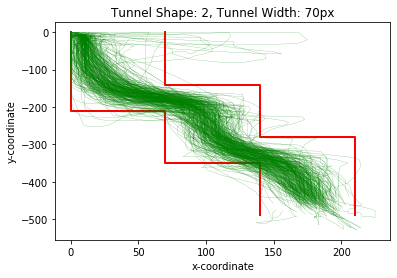

In [31]:
def plotAllTunnelData(idNo):
    if idNo==1:
        data=t5id1
    elif idNo==2:
        data=t5id2
    elif idNo==3:
        data=t5id3
    elif idNo==4:
        data=t5id4
    elif idNo==5:
        data=t5id5
    elif idNo==6:
        data=t5id6
    
    line1x, line1y, line2x, line2y =getTunnelBoundaries(idNo)
    
    line1x = np.array(line1x)
    line1y = np.array(line1y)
    line1y = -line1y
    
    line2x = np.array(line2x)
    line2y = np.array(line2y)
    line2y = -line2y
    
    plt.plot(line1x,line1y, color = "red", linewidth = 2)
    plt.plot(line2x,line2y, color = "red", linewidth = 2)
    
    for i in range(1,8):
        participantData=data.loc[(data['participant'] == i)]
        for i in range(0, participantData['hits'].max()):
            pTrial = participantData.loc[(participantData['hits'] == i)]
            pTrial = pTrial.iloc[3:]
            px = pTrial['mouseX']
            py = pTrial['mouseY']
            py = -py
        
            plt.plot(px,py, linewidth=0.15, color="green")
            
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.title("Tunnel Shape: 2, Tunnel Width: 70px")
            
 
plotAllTunnelData(6) #change id as needed
        

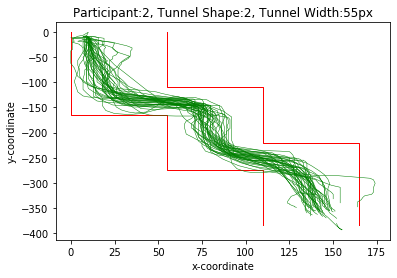

In [32]:
def plotTunnelData(tunnelid, participantData, participant, tunnelshape, width): 
    
    line1x, line1y, line2x, line2y =getTunnelBoundaries(tunnelid)
    
    line1x = np.array(line1x)
    line1y = np.array(line1y)
    line1y = -line1y
    
    line2x = np.array(line2x)
    line2y = np.array(line2y)
    line2y = -line2y
    
    
    plt.plot(line1x,line1y, color = "red", linewidth = 1)
    plt.plot(line2x,line2y, color = "red", linewidth = 1)
    
    for i in range(0, participantData['hits'].max()):
        pTrial = participantData.loc[(participantData['hits'] == i)]
        pTrial = pTrial.iloc[3:]
        px = pTrial['mouseX']
        py = pTrial['mouseY']
        py = -py
        
        plt.plot(px,py, linewidth=0.5, color="green")
     
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.title("Participant:"+str(participant)+", Tunnel Shape:"+str(tunnelshape)+", Tunnel Width:"+str(width)+"px")

    
plotTunnelData(5, p25, 2, 2, 55)

In [33]:
p1Data = [p11, p12, p13, p14, p15, p16]  
p2Data = [p21, p22, p23, p24, p25, p26]  
p3Data = [p31, p32, p33, p34, p35, p36]  
p4Data = [p41, p42, p43, p44, p45, p46]  
p5Data = [p51, p52, p53, p54, p55, p56]  
p6Data = [p61, p62, p63, p64, p65, p66]  
p7Data = [p71, p72, p73, p74, p75, p76]  

def getAvgHits(participant):
    if participant==1:
        data=p1Data
    elif participant==2:
        data=p2Data
    elif participant==3:
        data=p3Data
    elif participant==4:
        data=p4Data
    elif participant==5:
        data=p5Data
    elif participant==6:
        data=p6Data
    elif participant==7:
        data=p7Data
    
    allHits = [] 
    for i in data:
        allHits.append(i['hits'].max())
        
    allHits = np.array(allHits)
    print(allHits.mean())
    
getAvgHits(1) #change participant number as needed

36.333333333333336


## Test 6

In [34]:
pd.set_option('display.max_rows', test6all.shape[0]+1)

t6id1 = test6all.loc[(test6all['testID'] == 1)]
t6id2 = test6all.loc[(test6all['testID'] == 2)]
t6id3 = test6all.loc[(test6all['testID'] == 3)]

In [35]:
def getIdealLine(data, targetNo):
    if targetNo == 1:
        start = data.loc[(data['targetNo']==5)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 2:
        start = data.loc[(data['targetNo']==6)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
        
    elif targetNo == 3:
        start = data.loc[(data['targetNo']==7)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 4:
        start = data.loc[(data['targetNo']==8)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 5:
        start = data.loc[(data['targetNo']==9)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 6:
        start = data.loc[(data['targetNo']==1)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 7:
        start = data.loc[(data['targetNo']==2)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 8:
        start = data.loc[(data['targetNo']==3)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    elif targetNo == 9:
        start = data.loc[(data['targetNo']==4)]
        idealx1 = start['targetX'].unique()
        idealy1 = start['targetY'].unique()
        
        end = data.loc[(data['targetNo']==targetNo)]
        idealx2 = end['targetX'].unique()
        idealy2 = end['targetY'].unique()
    
    return idealx1, idealx2, idealy1, idealy2

[array([796]), array([670])] [array([514]), array([364])]


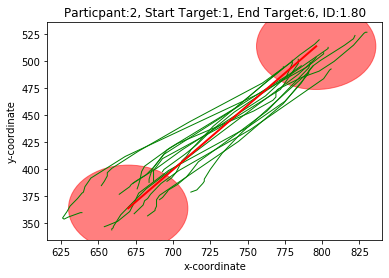

In [36]:
# method to plot by participant
def plotTargetPaths(participant, testId, targetNo):
    
    if testId==1:
        data=t6id1
    elif testId==2:
        data=t6id2
    elif testId==3:
        data=t6id3
    
    idealx1, idealx2, idealy1, idealy2 = getIdealLine(data, targetNo)
        
    idealx = [idealx1,idealx2]
    idealy = [idealy1,idealy2]
    
    
    required = test6all.loc[(test6all['participant'] == participant) & (test6all['testID']==testId) 
                            & (test6all['targetNo']==targetNo)]
    
    fig, ax = plt.subplots()
    for i in range(required['hits'].min(),required['hits'].max(),9):
        
        plotData  = required.loc[(required['hits'] == i)]
        rx = plotData['mouseX']
        ry = plotData['mouseY']
        ax.plot(rx,ry, color="green", linewidth=1)
        
    plt.plot(idealx,idealy,color="red", linewidth=2)

    circle1 = plt.Circle((idealx[1], idealy[1]), 40, color='r', alpha=0.5)
    circle2 = plt.Circle((idealx[0], idealy[0]), 40, color='r', alpha=0.5)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    print(idealx,idealy)
    
    ax.set_xlabel("x-coordinate")
    ax.set_ylabel("y-coordinate")
    ax.set_title("Particpant:2, Start Target:1, End Target:6, ID:1.80")
  
 
# change arguments as needed to get plot of required participant, testID and targetNo
plotTargetPaths(2,3,6)

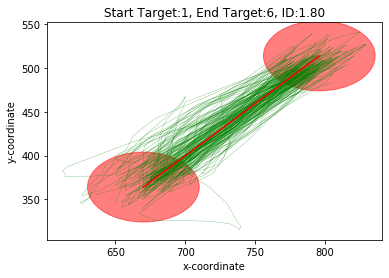

In [37]:
# method to plot by testId
def plotById(testId, targetNo):
    
    if testId==1:
        data=t6id1
    elif testId==2:
        data=t6id2
    elif testId==3:
        data=t6id3
    
    idealx1, idealx2, idealy1, idealy2 = getIdealLine(data, targetNo)
    
    idealx = [idealx1,idealx2]
    idealy = [idealy1,idealy2]
    
    required = test6all.loc[(test6all['testID']==testId) & (test6all['targetNo']==targetNo)]
    
    
    fig, ax = plt.subplots()   
    for i in range(required['hits'].min(),required['hits'].max(),9):
        
        plotData  = required.loc[(required['hits'] == i)]
        rx = plotData['mouseX']
        ry = plotData['mouseY']
        ax.plot(rx,ry, color="green", linewidth = 0.20)
    
    circle1 = plt.Circle((idealx[1], idealy[1]), 40, color='r', alpha=0.5)
    circle2 = plt.Circle((idealx[0], idealy[0]), 40, color='r', alpha=0.5)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
        
    ax.plot(idealx,idealy,color="red", linewidth=1.5) 
    ax.set_xlabel("x-coordinate")
    ax.set_ylabel("y-coordinate")
    ax.set_title("Start Target:1, End Target:6, ID:1.80")

plotById(3,6)       

In [38]:
def getTestTimes(testId):
    required = test6all.loc[(test6all['testID']==testId)]   
    for i in range(1,8):
        participantData = required.loc[(test6all['participant']==i)]
        print(participantData['testTime'].max())
 
getTestTimes(3) #change testId as needed

67.012
60.556000000000004
71.3
67.656
63.966
111.03
68.876
